In [17]:
from trn import *
import cvt
import numpy as np
import matplotlib.pyplot as plt

In [36]:
class PointSampler:


    def __init__(self, volume, random_seed=None):
        self.volume = volume
        self.x = []
        self.y = []
        self.z = []
        self.random_seed = random_seed
        self.map_th = self.volume.copy()

    def threshold(self, thresh):
        self.map_th[self.map_th < thresh] = 0

    def sample(self, M):
        pass

    def show_points(self, size=2, color='#ff5a5a'):
        
        fig = plt.figure(figsize=(12, 12))
        ax = fig.add_subplot(projection='3d')
        ax.scatter(self.x, self.y, self.z, c=color, s=size)
        plt.show()

    def save_points(self, fname):
        f = open(fname, 'w')
        f.write(json.dumps({'x':self.x, 'y':self.y, 'z':self.z}))
        f.close()

    def load_points(self, fname):
        f = open(fname, 'r')
        j = json.loads(f.read())
        f.close()
        self.volume = None
        self.x = j['x']
        self.y = j['y']
        self.z = j['z']

    def get_centroid(self):
        centroid = np.array([0., 0., 0.])
        for i in range(len(global_x)):
            centroid[0] += self.x[i] / len(global_x)
            centroid[1] += self.y[i] / len(global_x)
            centroid[2] += self.z[i] / len(global_x)
        return centroid





class TRNPointSampler(PointSampler):


    def __init__(self, volume, random_seed=None, l0_factor=0.005, lf=0.5, tf_factor=8, e0=0.3, ef=0.05):
        super().__init__(volume, random_seed)
        self.l0_factor = l0_factor
        self.lf = lf
        self.tf_factor = tf_factor
        self.e0 = e0
        self.ef = ef

    def sample(self, M):
        rm0,arr_flat,arr_idx,xyz,coords_1d = trn_rm0(self.map_th, M, random_seed=self.random_seed)
        l0 = self.l0_factor * M 
        lf = self.lf
        tf = M * self.tf_factor
        e0 = self.e0
        ef = self.ef

        rms,rs,ts_save = trn_iterate(rm0,arr_flat,arr_idx,xyz,n_save=10,e0=e0,ef=ef,l0=l0,lf=lf,tf=tf,do_log=True,log_n=10)

        N_cube = max(self.map_th.shape[0],self.map_th.shape[1],self.map_th.shape[2])
        N_cube += N_cube%2

        for p in rms[10]:
            self.x.append(p[0] + N_cube//2)
            self.y.append(p[1] + N_cube//2)
            self.z.append(p[2] + N_cube//2)





class CVTPointSampler(PointSampler):


    def __init__(self, volume, random_seed=None, max_iter=10):
        super().__init__(volume, random_seed)
        self.max_iter = max_iter

    def sample(self, M):

        robs, map_edited = cvt.get_init(self.map_th, M, self.random_seed)

        robs = cvt.iterate(map_edited, robs)

        N = map_edited.shape[0]
        for i in range(len(robs)):
            self.x.append(robs[i][0] * N)
            self.y.append(robs[i][1] * N)
            self.z.append(robs[i][2] * N)
            
            
            

            


In [34]:
import mrcfile
import time

In [27]:
map_mrc = mrcfile.open('EMD-1717.map')
map_original = map_mrc.data

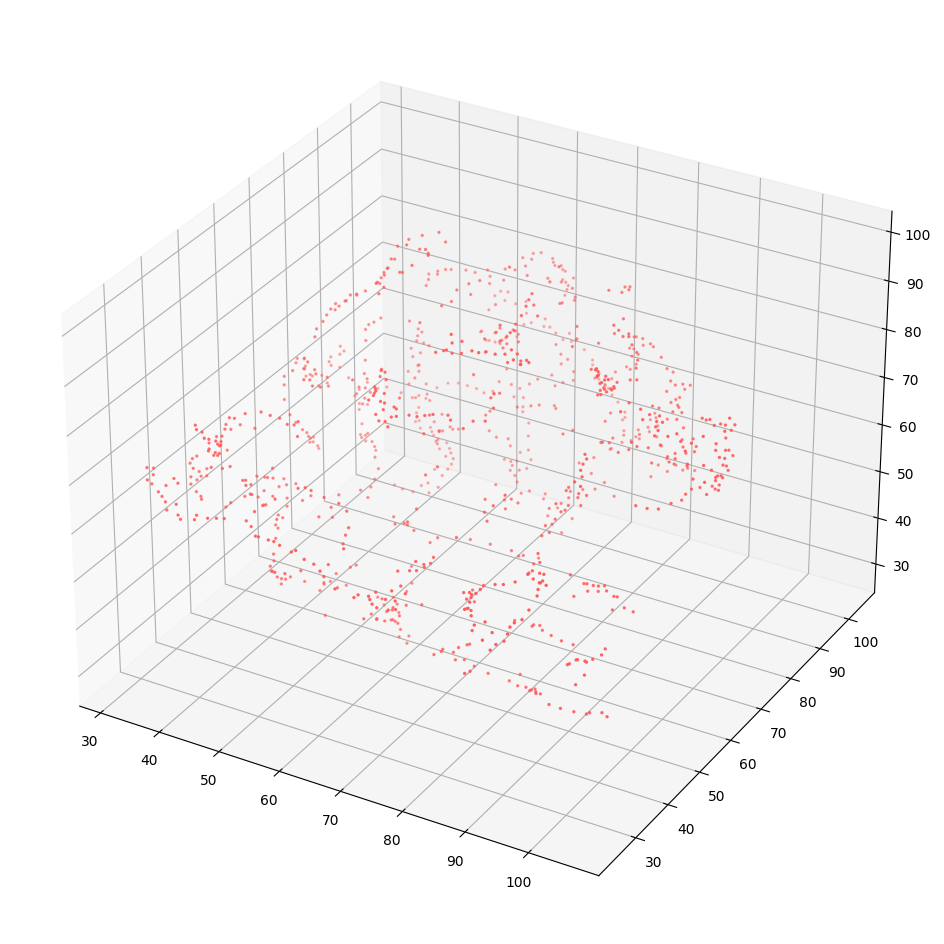

In [28]:
ps = TRNPointSampler(map_original)
ps.threshold(68.5)
ps.sample(1000)
ps.show_points()

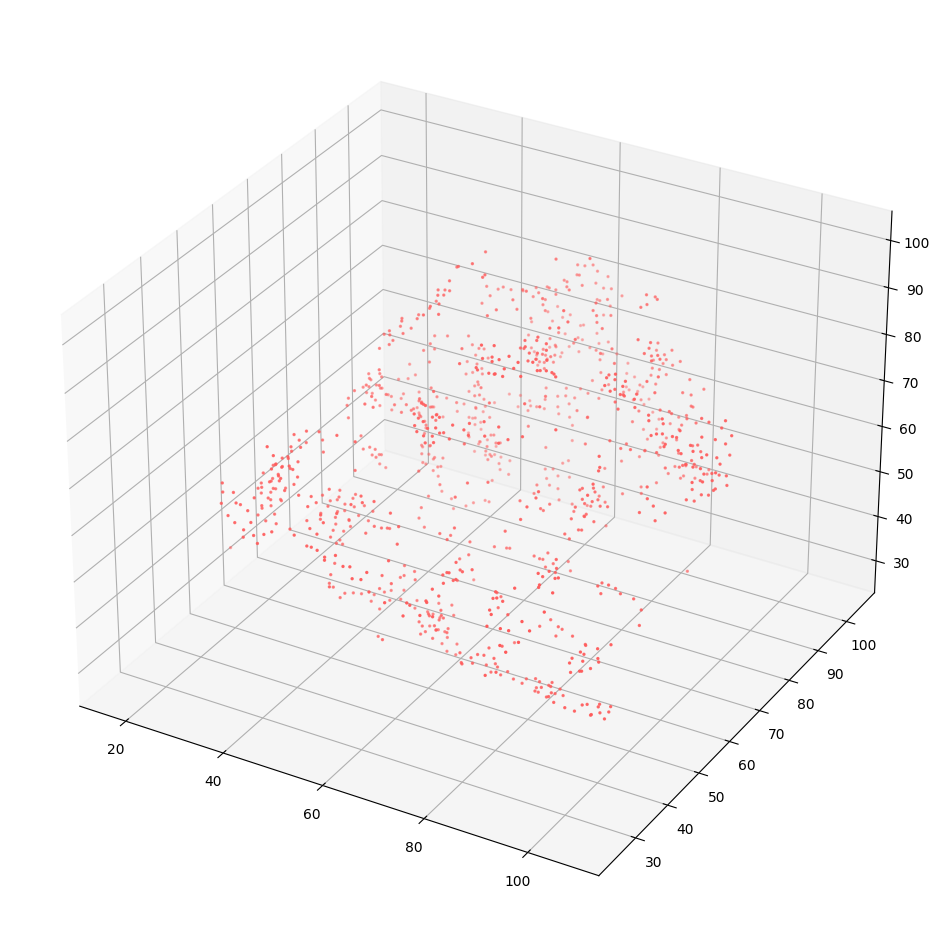

55.746960401535034


In [37]:
t = time.time()
ps = CVTPointSampler(map_original)
ps.threshold(68.5)
ps.sample(1000)
ps.show_points()
print(time.time() - t)

In [32]:
ps.z

[47.30861022532509,
 49.96841986230205,
 85.3950081622084,
 51.8387995927802,
 64.40093334425904,
 85.76248986615578,
 88.53859771867896,
 60.951830896543335,
 64.42427444997472,
 67.05683221690344,
 67.59473564904235,
 78.08220621412264,
 79.4907333491665,
 66.59028127341307,
 70.24686368939251,
 68.69828069724481,
 92.59954692176439,
 87.60544019685089,
 50.68373887105956,
 75.41036317733943,
 85.19110313009527,
 36.99878225836265,
 63.9522128266491,
 64.62886055911402,
 65.06971523621746,
 41.714408490555115,
 85.04432828476065,
 83.62460347853272,
 83.48666221956165,
 68.4457538354921,
 89.92209028522807,
 89.63964329218209,
 92.77297552207449,
 92.66431047819403,
 75.32845784753533,
 67.49477460450083,
 66.39364507880845,
 65.8833375448479,
 64.55469139556632,
 64.13880570993366,
 65.4288994012742,
 66.95489327821929,
 74.60083450611005,
 90.45835394085059,
 79.51794342369344,
 63.35833940419345,
 80.88990329482075,
 69.70170004723418,
 67.12453132007437,
 72.23925289860874,
 74.5